In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hotel Booking Analysis Objectives:

1. Where guests are coming from
2. Reservation by room type
3. Average Daily rate by hotel per month
4. Hotel type with more time spent.
5. Hotel reservations by market segment
6. Cancellation frequency, cancellation by repeat and non-repeat customers
7. Monthly customers and cancellations.

# Capstone 3 - EDA for Predicting Cancellations
Loading the df from the previous Data Wrangling file:

In [62]:
df = pd.read_csv('df')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119210 entries, 0 to 119209
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119206 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal            

# Numerical Distribution: Histogram of Dataset

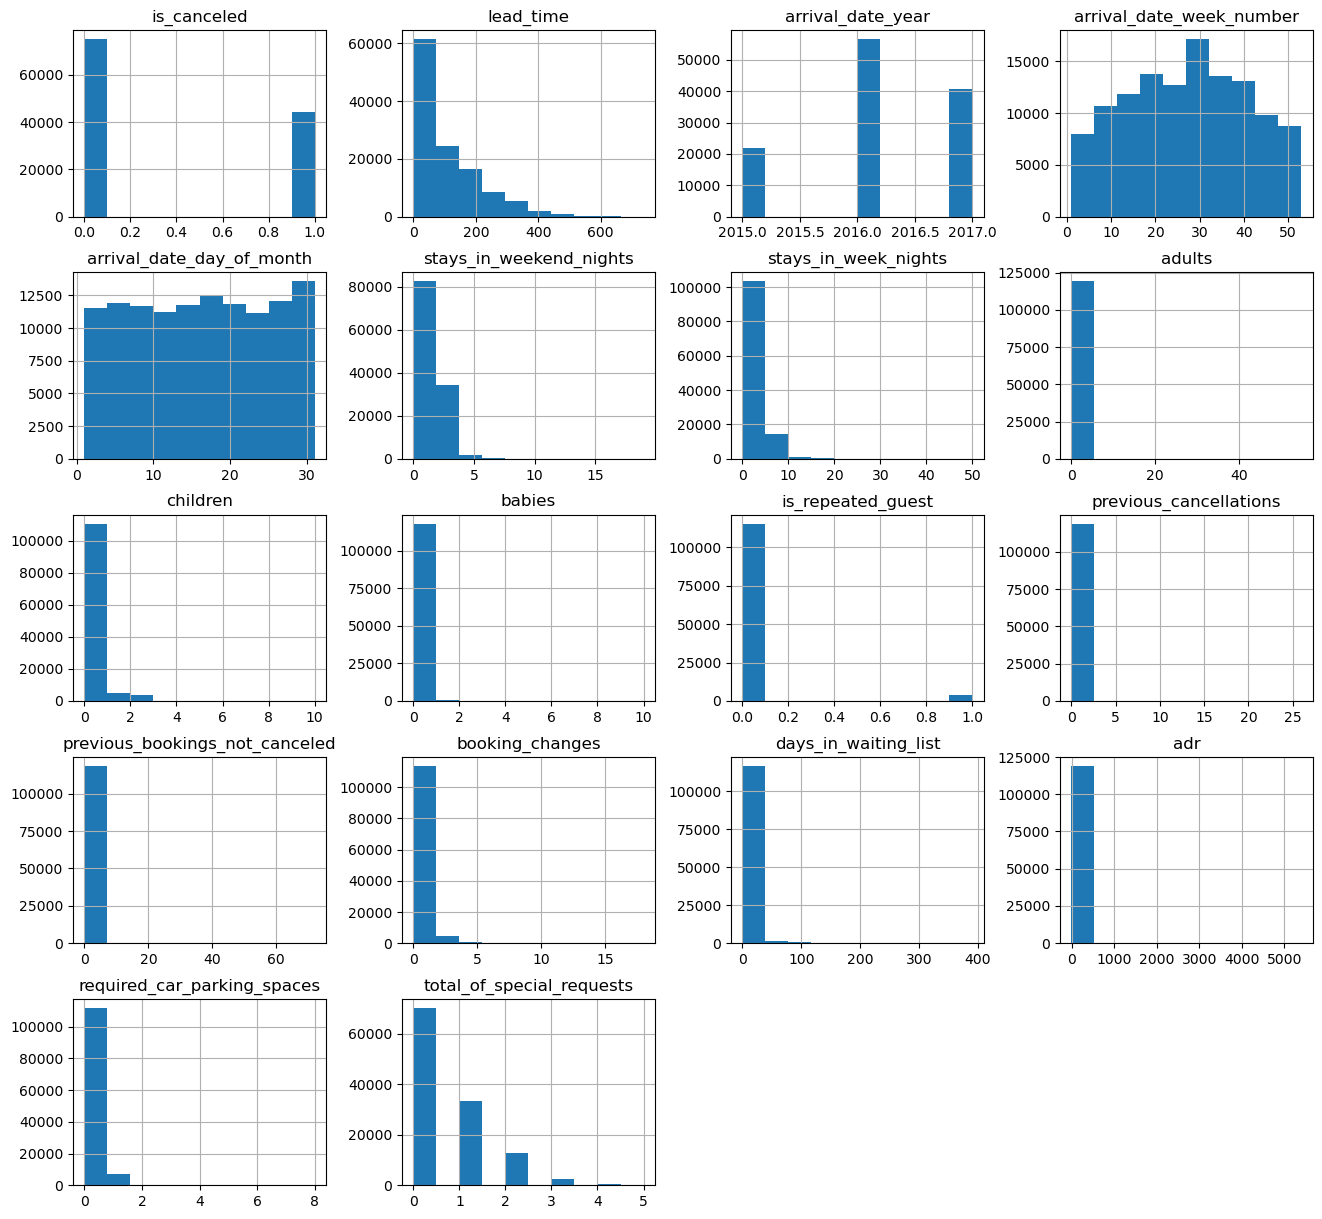

In [3]:
df.hist(figsize=(16,15))
plt.show()

# EDA and Feature Engineering

In this notebook, I would like to visualize statistical relationships and features to understand the data fully through an analysis.

**Hotel Type Details**

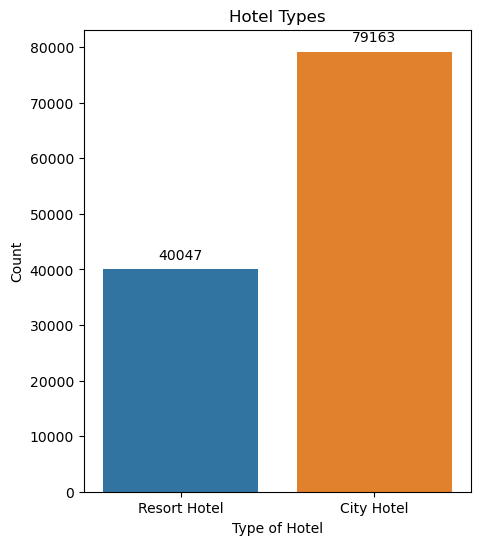

In [4]:
plt.figure(figsize=(5, 6))
ax = sns.countplot(x='hotel', data=df)

# Adding count labels above each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Hotel Types')
plt.xlabel('Type of Hotel')
plt.ylabel('Count')

plt.show()

Resort hotel indicates 40,047 rows of data where the city hotel indicates 79,163. Lets now see where all of the customers are coming from?

In [5]:
guests_by_country = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
guests_by_country.columns = ['country', 'No of guests']
guests_by_country.sort_values('No of guests', ascending=False).head(10)

,country,No of guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
5,IRL,2542
6,ITA,2428
7,BEL,1868
8,NLD,1716
9,USA,1592


This indicates that most guests are coming from Portugal, and the rest are coming from neighboring European countries with the exclusion of the United States at 10th. 

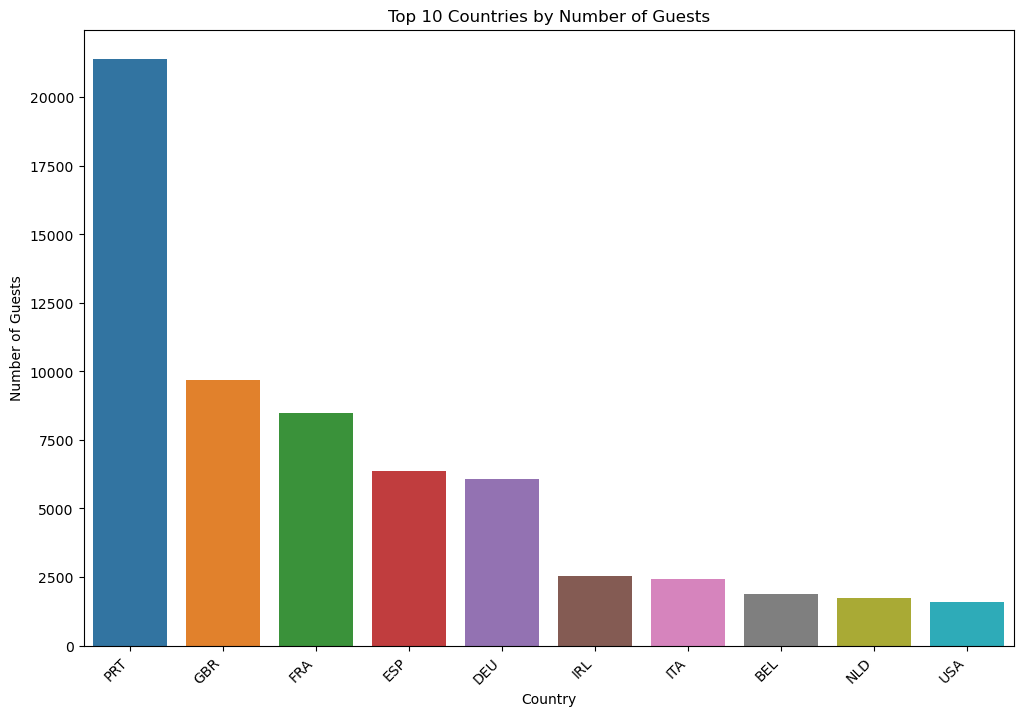

In [6]:
country_data = pd.DataFrame(df.loc[df["is_canceled"] == 0]["country"].value_counts())
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index

# Sort the data by number of guests in descending order and select top 10 countries
country_data_top10 = country_data.head(10)

# Create bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x="country", y="Number of Guests", data=country_data_top10)
plt.title('Top 10 Countries by Number of Guests')
plt.xlabel('Country')
plt.ylabel('Number of Guests')

# Show the plot
plt.xticks(rotation=45, ha='right') 
plt.show()

Lets now see the type of rooms people are reserving per hotel type (resort and city):

Text(0, 0.5, 'ADR')

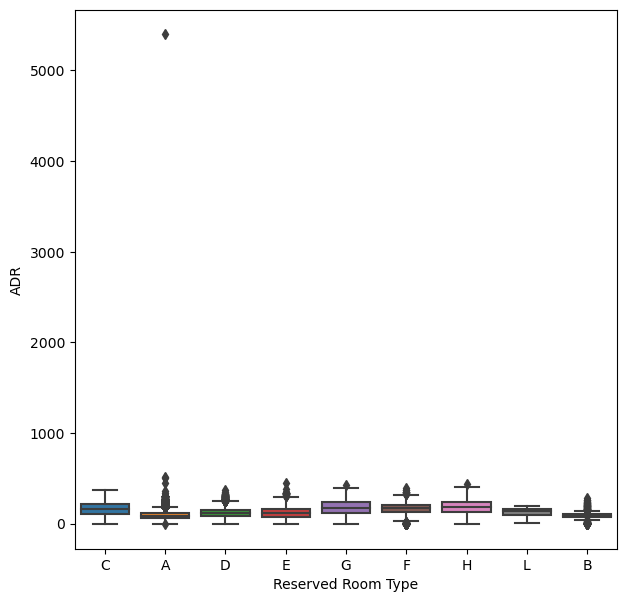

In [7]:
plt.figure(figsize=(7,7))
sns.boxplot(x='reserved_room_type', y='adr', data=df)
plt.xlabel('Reserved Room Type')
plt.ylabel('ADR')

In [8]:
df['adr'].sort_values(ascending=True)

14962       -6.38
0            0.00
41084        0.00
101802       0.00
41102        0.00
           ...   
13135      450.00
103784     451.50
15076      508.00
111239     510.00
48491     5400.00
Name: adr, Length: 119210, dtype: float64

There seems to be a Average Daily rate of 5400 and -6.38, we will drop these outliers and temporarily store the dataset into a different dataframe to showcase this particular boxplot. 'df' will still remain the same. 

In [11]:
df_new = df.copy()

In [12]:
df_new.loc[[14962, 48491],'adr']=None

Now lets see the graph without the two rows that were removed temporarily

Text(0, 0.5, 'ADR')

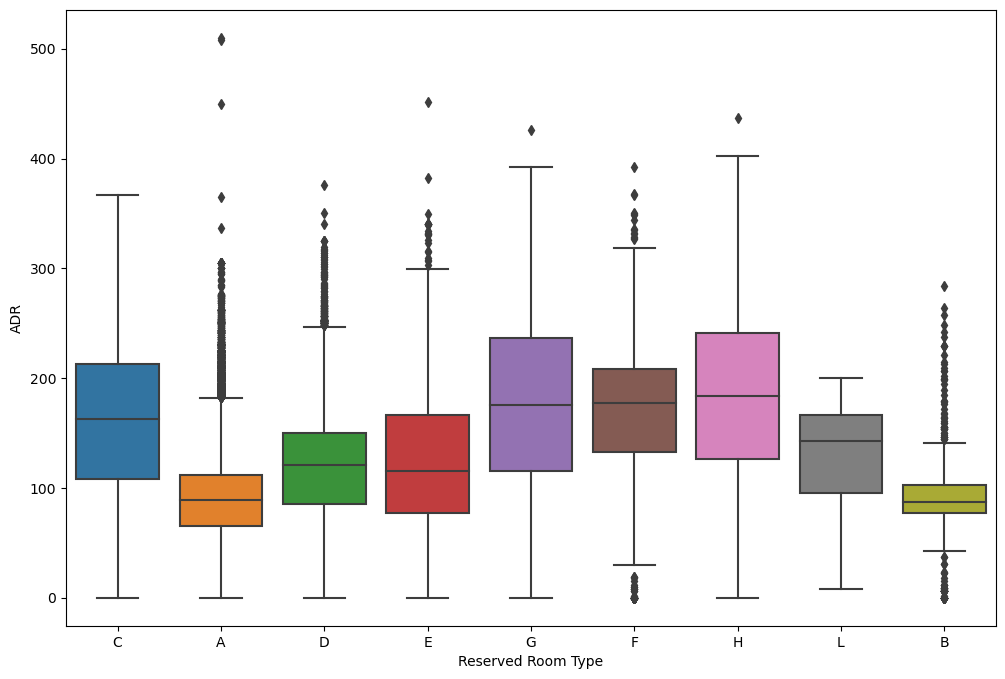

In [15]:
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type', y='adr', data=df_new)
plt.xlabel('Reserved Room Type')
plt.ylabel('ADR')

Now, lets see the average daily rate closely on average per month

In [16]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

The months are not in order, so we will create a list where the months are in order:

In [17]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

In [18]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [19]:
city_hotel = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


Lets take a look at these values visually:

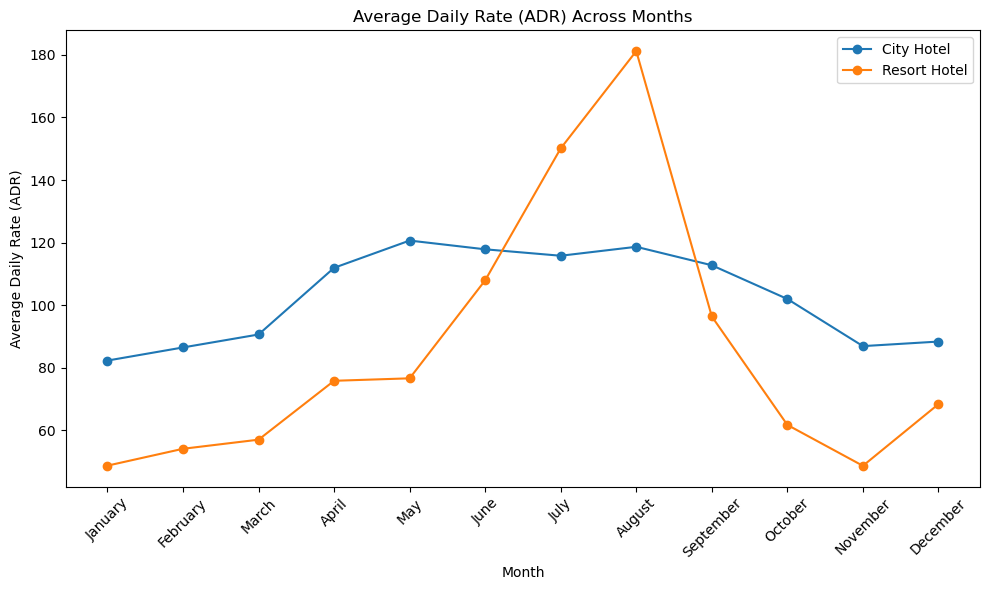

In [20]:
month_order = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
               'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

city_hotel_sorted = city_hotel.sort_values(by='arrival_date_month', key=lambda x: x.map(month_order))
resort_hotel_sorted = resort_hotel.sort_values(by='arrival_date_month', key=lambda x: x.map(month_order))

plt.figure(figsize=(10, 6)) 

plt.plot(city_hotel_sorted['arrival_date_month'], city_hotel_sorted['adr'], label='City Hotel', marker='o')
plt.plot(resort_hotel_sorted['arrival_date_month'], resort_hotel_sorted['adr'], label='Resort Hotel', marker='o')

plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('Average Daily Rate (ADR) Across Months')
plt.xticks(rotation=45)  
plt.legend()  

plt.tight_layout() 
plt.show()

The average daily rates by month are shown above, so now we can see which of these months have the most arrivals:

Text(0, 0.5, 'Count')

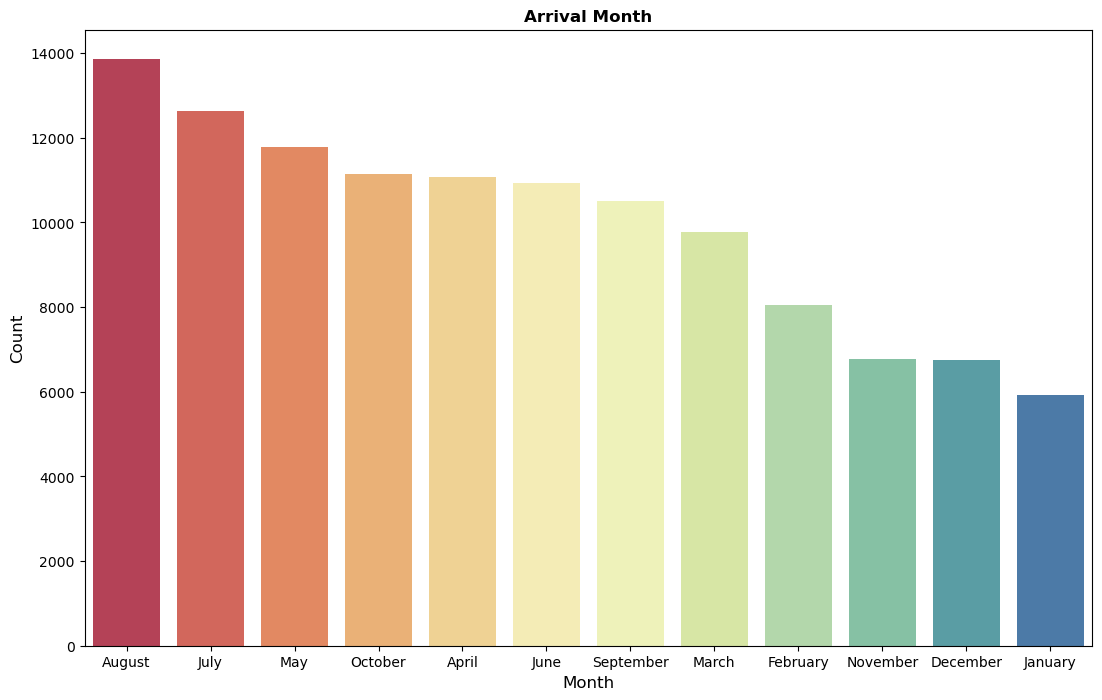

In [31]:
plt.figure(figsize=(13,8))
sns.countplot(x='arrival_date_month', data = df,
              order=pd.value_counts(df['arrival_date_month']).index, palette='Spectral')
plt.title('Arrival Month', weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)

From the above graph, we can see that months around the summer time, and the warmer months of spring and fall have the highest count of reservations where as months like February, December and January are at the lowest count of reservations. We will take a look at the specific numbers by month for each of the hotel types.

In [24]:
resort_guest_count = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guest_count

,index,arrival_date_month
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [25]:
city_guest_count = data_city['arrival_date_month'].value_counts().reset_index()
city_guest_count

,index,arrival_date_month
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


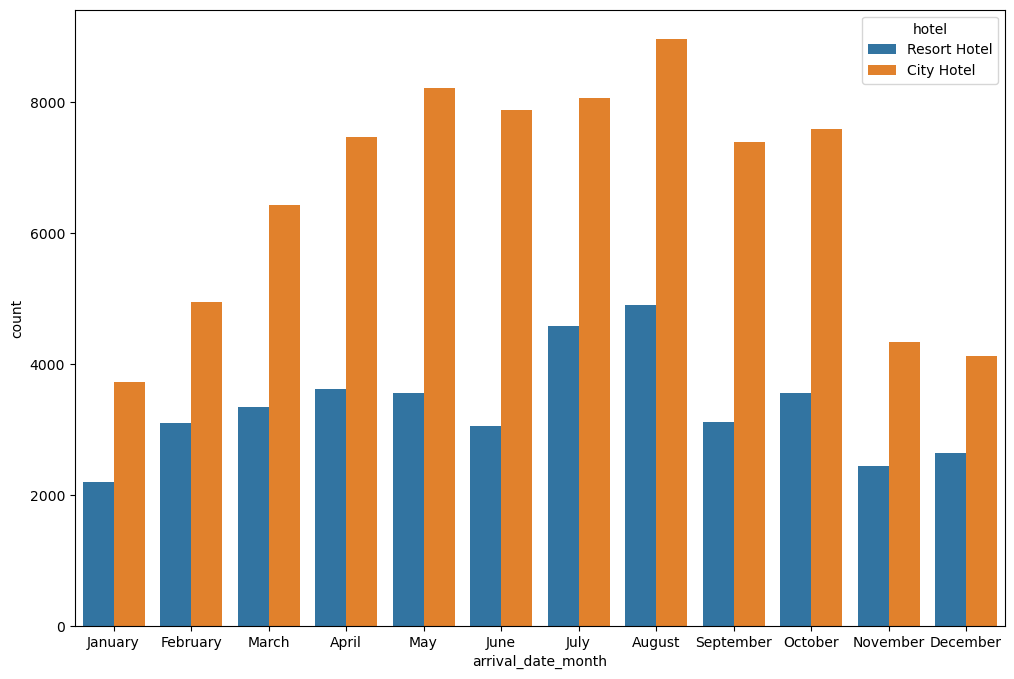

In [59]:
month_order = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
               'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

plt.figure(figsize=(12,8))
sns.countplot(x='arrival_date_month', data=df, hue='hotel', order=month_order)
plt.show()

Both hotel types have the most incoming guests in August and July which are the peak summer times of the year. Additionally, November, December and January have the lowest count of incomng arrivals of the year. 
Now, we should take a look at how many days guests tend to stay at their hotels.

In [26]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [27]:
stay_duration = df.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay_duration = stay_duration.iloc[:, :3]
stay_duration = stay_duration.rename(columns={'is_canceled':'Number of stays'})
stay_duration.head(30)

,total_nights,hotel,Number of stays
0,0,City Hotel,264
1,0,Resort Hotel,381
2,1,City Hotel,13258
3,1,Resort Hotel,7747
4,2,City Hotel,21415
5,2,Resort Hotel,6217
6,3,City Hotel,21371
7,3,Resort Hotel,5693
8,4,City Hotel,12547
9,4,Resort Hotel,4826


A lot of people tend to stay at least two nights to 7 nights. It will be easier to view this through a visualization:

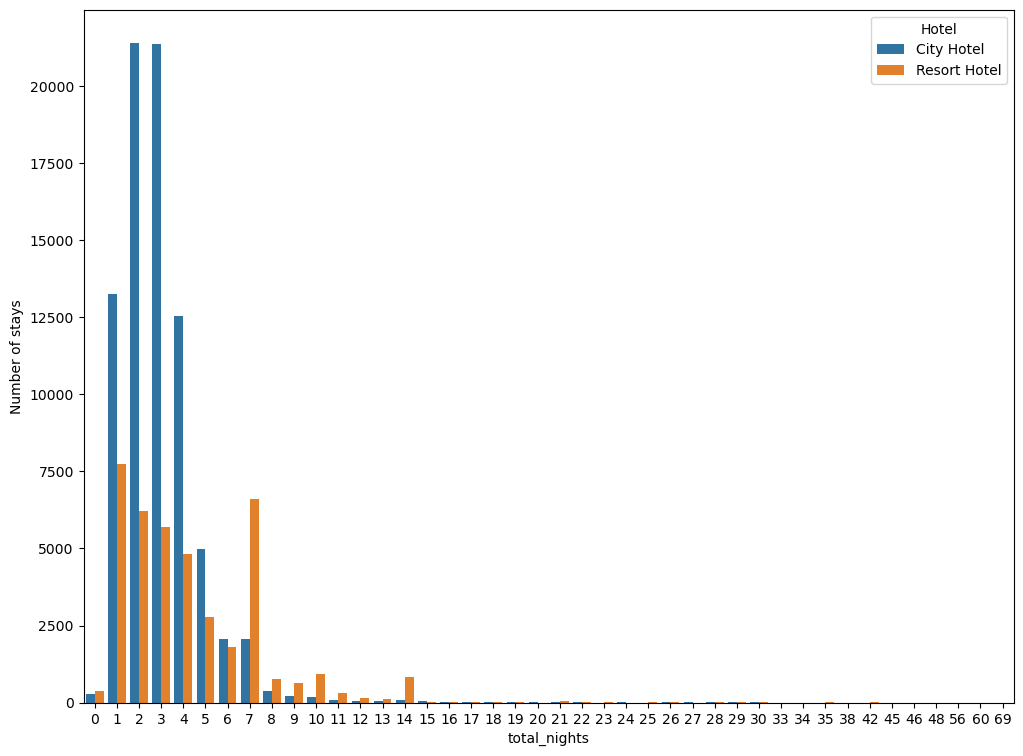

In [28]:
plt.figure(figsize=(12,9))
sns.barplot(x='total_nights',y='Number of stays', data=stay_duration, hue='hotel')
plt.legend(title="Hotel", loc='upper right')

This is slighlty difficult to understand for the bigger perspective, so we will separate the data by hotels and create the same graph above.

I will first add the total nights for both resort and city hotels. 

In [39]:
data_resort['total_nights'] = data_resort['stays_in_week_nights'] + data_resort['stays_in_weekend_nights']
data_city['total_nights'] = data_city['stays_in_week_nights'] + data_city['stays_in_weekend_nights']

number_nights_resort = list(data_resort["total_nights"].value_counts().index)
number_bookings_resort = list(data_resort["total_nights"].value_counts())
rel_bookings_resort = data_resort["total_nights"].value_counts() / sum(number_bookings_resort) * 100

number_nights_city = list(data_city["total_nights"].value_counts().index)
number_bookings_city = list(data_city["total_nights"].value_counts())
rel_bookings_city = data_city["total_nights"].value_counts() / sum(number_bookings_city) * 100

/var/folders/2r/qvwb_49162s3q75v3pr4d1x00000gn/T/ipykernel_37299/4076447087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_resort['total_nights'] = data_resort['stays_in_week_nights'] + data_resort['stays_in_weekend_nights']
/var/folders/2r/qvwb_49162s3q75v3pr4d1x00000gn/T/ipykernel_37299/4076447087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_city['total_nights'] = data_city['stays_in_week_nights'] + data_city['stays_in_weekend_nights']


In [41]:
resort_nights = pd.DataFrame({"hotel": "Resort hotel",
                           "number_nights": number_nights_resort,
                           "rel_num_bookings": rel_bookings_resort})

city_nights = pd.DataFrame({"hotel": "City hotel",
                           "number_nights": number_nights_city,
                           "rel_num_bookings": rel_bookings_city})

nights_data = pd.concat([resort_nights, city_nights], ignore_index=True)

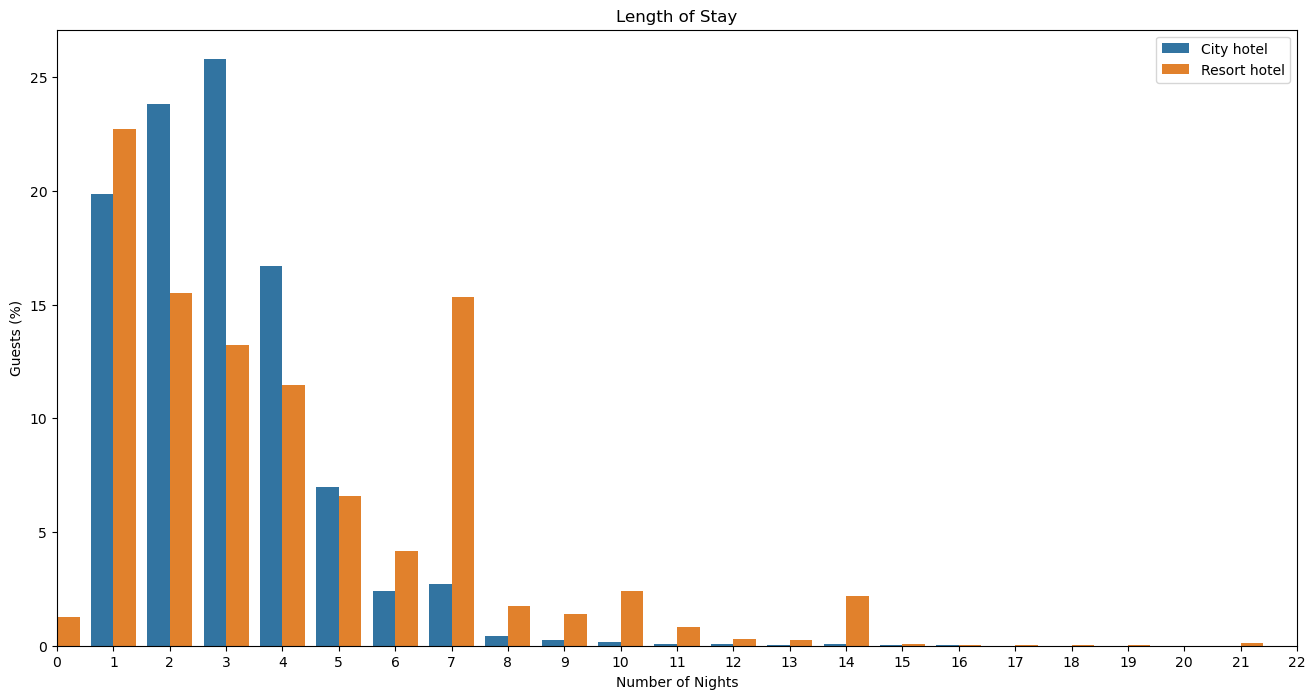

In [47]:
plt.figure(figsize=(16, 8))
sns.barplot(x='number_nights', y='rel_num_bookings', data=nights_data, hue="hotel", hue_order=['City hotel', 'Resort hotel'])
plt.title("Length of Stay")
plt.xlabel("Number of Nights")
plt.ylabel("Guests (%)")
plt.legend(loc='upper right')
plt.xlim(0,22)
plt.show()

We will see the average duration for both hotels to see how long people tend to stay on average.

In [52]:
average_nights_resort = sum(list((resort_nights["number_nights"] * (resort_nights["rel_num_bookings"]/100)).values))
average_nights_city = sum(list((city_nights["number_nights"] * (city_nights["rel_num_bookings"]/100)).values))

print(f"Guests at city hotels stay on average {average_nights_city:.2f} nights, and {city_nights['number_nights'].max()} at maximum.")
print(f"Guests at resort hotels stay on average {average_nights_resort:.2f} nights, and {resort_nights['number_nights'].max()} at maximum.")

Guests at city hotels stay on average 2.92 nights, and 48 at maximum.
Guests at resort hotels stay on average 4.14 nights, and 69 at maximum.


For the resort hotel, although the average nights are at 4.14, staying 7 nights is a popular option as well.

With this in mind, we will look at the nights spent weekend and weekday by market segments. A Boxplot will be a good visualization to see this:

Text(0.5, 0, 'Market Segment')

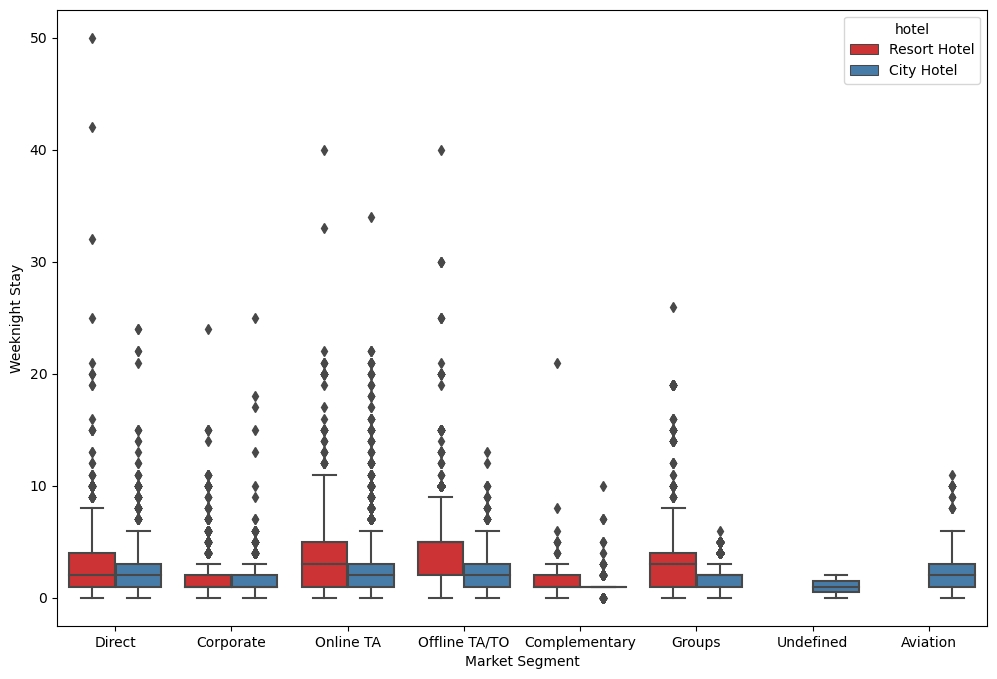

In [49]:
plt.figure(figsize=(12,8))
sns.boxplot(x='market_segment', y='stays_in_week_nights', hue='hotel', data=df, palette='Set1')
plt.ylabel("Weeknight Stay")
plt.xlabel("Market Segment")

<Axes: xlabel='market_segment', ylabel='stays_in_weekend_nights'>

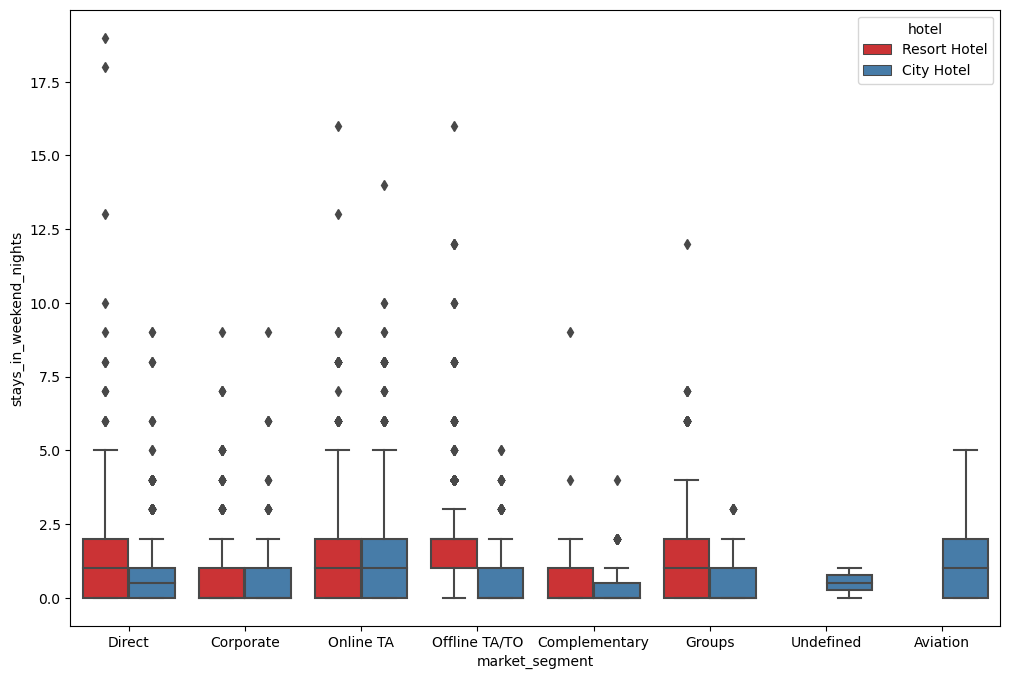

In [30]:
plt.figure(figsize=(12,8))
sns.boxplot(x='market_segment', y='stays_in_weekend_nights', hue='hotel', data=df, palette='Set1')

From the two visualizations above, the majority of the groups exhibit a normal distribution, with some showing significant skewness. Upon examining the distributions, it's evident that the majority of individuals opt for shorter stays at hotels, typically not extending beyond a week. Additionally, resort hotels accommodate stays of up to 12-13 days, which appears to be a common trend. However, the duration of stays varies across different segments, with durations surpassing 15 days generally considered as outliers within each segment. While creating a combined feature of total time by aggregating weekend and weeknight stays would provide clearer insights, the discrepancy is apparent when observing both visualizations concurrently.

Interestingly, customers belonging to the Aviation Segment tend to avoid resort hotels, favoring instead lower average stays. Additionally, there is little disparity between weekend and weekday averages for this segment, suggesting that customers in the Aviation Segment likely visit for business purposes, possibly due to the proximity of airports to city hotels rather than resort areas.

Overall, it's evident that guests staying at resort hotels tend to prefer longer durations, reflecting a distinct preference for extended stays in such accommodations.

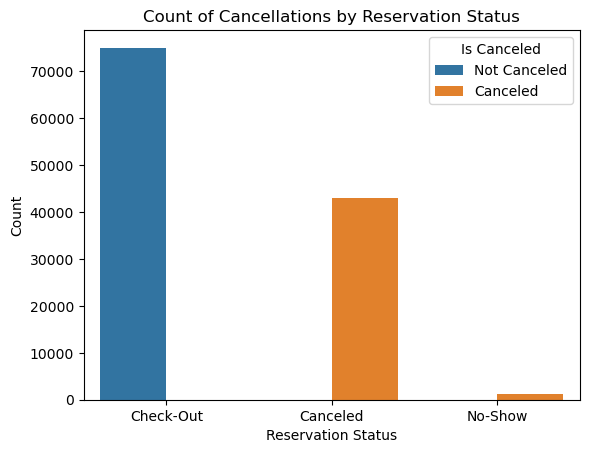

In [53]:
plt.figure
sns.countplot(x='reservation_status', hue='is_canceled', data=df)
plt.title('Count of Cancellations by Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()

We have a general idea of how many checked out and how many have canceled their reservations. There are cases of no-shows as well. There is a variable called 'is_repeated_guests' so we can check out whether the repeated_guests have cancellations or not.

Text(0.5, 1.0, 'Canceled or not')

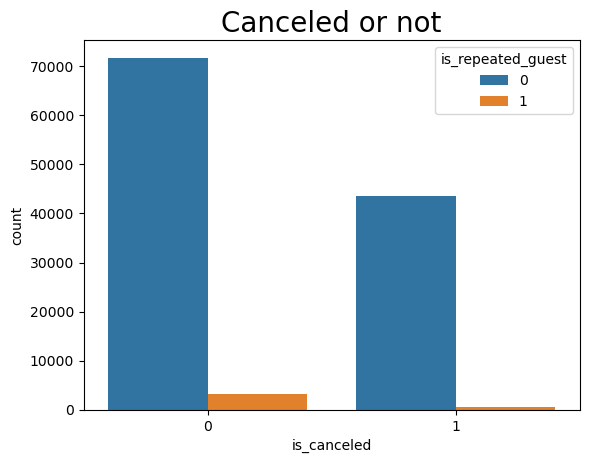

In [54]:
ax = sns.countplot(x = "is_canceled", hue = 'is_repeated_guest', data = df)
plt.title("Canceled or not", fontdict = {'fontsize': 20})

We can see that repeated guests do not cancel their reservations. The guests that do cancel are not repeat guests.

I will now put out the exact numbers for cancellations with a visualization to interpret how much cancellations we are dealing with from this dataset.

In [65]:
total_cancellations = df["is_canceled"].sum()
resort_cancellations = df.loc[df["hotel"] == "Resort Hotel"]["is_canceled"].sum()
city_cancellations = df.loc[df["hotel"] == "City Hotel"]["is_canceled"].sum()

# as percent:
rel_cancel = total_cancellations / df.shape[0] * 100
resort_rel_cancel = resort_cancellations / df.loc[df["hotel"] == "Resort Hotel"].shape[0] * 100
city_rel_cancel = city_cancellations / df.loc[df["hotel"] == "City Hotel"].shape[0] * 100

print(f"Cancellations")

print(f"Total Hotel Cancellations: {total_cancellations:,} ({rel_cancel:.0f} %)")
print(f"Resort Hotel Cancellations: {resort_cancellations:,} ({resort_rel_cancel:.0f} %)")
print(f"City Hotel Cancellations: {city_cancellations:,} ({city_rel_cancel:.0f} %)")

Cancellations
Total Hotel Cancellations: 44,199 (37 %)
Resort Hotel Cancellations: 11,120 (28 %)
City Hotel Cancellations: 33,079 (42 %)


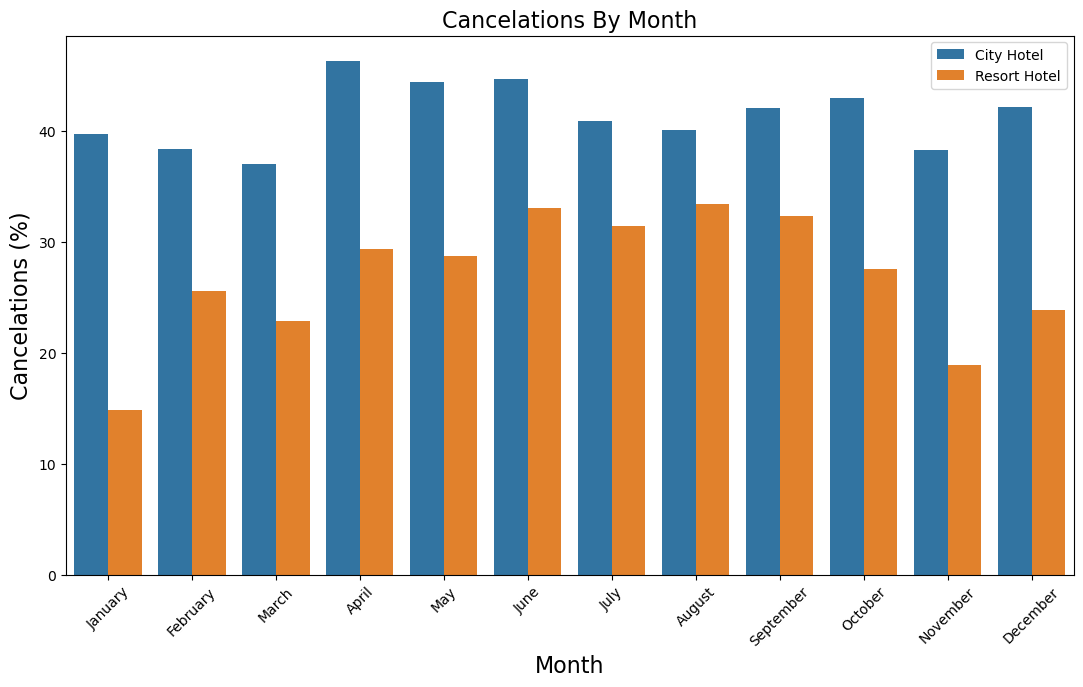

In [70]:
resort_book_per_month = df.loc[(df["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
resort_cancel_per_month = df.loc[(df["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

city_book_per_month = df.loc[(df["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
city_cancel_per_month = df.loc[(df["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

resort_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(resort_book_per_month.index),
                                "Bookings": list(resort_book_per_month.values),
                                "Cancelations": list(resort_cancel_per_month.values)})
city_cancel_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(city_book_per_month.index),
                                "Bookings": list(city_book_per_month.values),
                                "Cancelations": list(city_cancel_per_month.values)})

full_cancel_data = pd.concat([resort_cancel_data, city_cancel_data], ignore_index=True)
full_cancel_data["cancel_percent"] = full_cancel_data["Cancelations"] / full_cancel_data["Bookings"] * 100


month_order = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
               'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

full_cancel_data["Month"] = pd.Categorical(full_cancel_data["Month"], categories=month_order, ordered=True)

# show figure:
plt.figure(figsize=(13, 7))
sns.barplot(x = "Month", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=full_cancel_data)
plt.title("Cancelations By Month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancelations (%)", fontsize=16)
plt.legend(loc="upper right")
plt.show()

Looking at the graph above, cancellations are quite frequent amongst guests who reserved for the city hotels. 
Throughout the season, around 40% cancel their reservations.

On the other hand, resort hotels have lower cancellation rates. Cancellations are more common during the summer season where the most reservations are made and the lowest during November-January.

Now, we can go ahead and move onto the preprocessing step for the capstone.